# Decision Trees

In [1]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz, plot_tree
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import cross_val_score

!pip3 install graphviz
#https://graphviz.org/download/

!pip3 install tqdm
from tqdm import tqdm

import matplotlib.pyplot as plt
#!pip3 install pydotplus
#import pydotplus
#from IPython.display import Image

In [2]:
filename = 'kc_house_data.csv'

In [3]:
#https://www.kaggle.com/harlfoxem/housesalesprediction

#Don't think too much about the getDataset method. It is used for convenience
def getDataset(filename, **kwargs):
    url = f'https://github.com/IvanReznikov/mdx-msc-data-science/raw/main/datasets/{filename}'
    try:
        import os
        if filename not in os.listdir():
            !pip install wget
            import wget
            downloaded_filename = wget.download(url)
            print(f'{downloaded_filename} file downloaded')
        else:
            print(f'{filename} already exists')
        return pd.read_csv(filename, **kwargs)
        
    except Exception as e:
        print(e)
        return pd.read_csv(url, **kwargs)

In [4]:
df = getDataset(filename)
df.head()

kc_house_data.csv already exists


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Preprocessing

In [5]:
drop_columns = ['id', 'date']
df.drop(drop_columns, inplace=True, axis=1)

In [6]:
mini_df = df.iloc[:100]

## DecisionTreeRegressor

In [7]:
target = "price"
df_X = mini_df[[x for x in mini_df.columns if x != target]]
df_y = mini_df[target]

clf_tree = DecisionTreeRegressor(max_depth=4)
clf_tree.fit(df_X, df_y)

DecisionTreeRegressor(max_depth=4)

In [8]:
def tree_graph_to_png(tree, feature_names, png_file_to_save=None):
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)
    if png_file_to_save:
        graph.write_png(png_file_to_save)
    return Image(graph.create_png(), width = 1000, height = 500)

In [9]:
#tree_graph_to_png(tree=clf_tree, feature_names=[x for x in mini_df.columns if x != target])

[Text(540.2857142857143, 543.6, 'X[2] <= 2690.0\nsquared_error = 91794067671.828\nsamples = 100\nvalue = 519149.35'),
 Text(283.42857142857144, 422.8, 'X[14] <= 47.519\nsquared_error = 31500606191.519\nsamples = 78\nvalue = 417364.615'),
 Text(141.71428571428572, 302.0, 'X[16] <= 2260.0\nsquared_error = 8965087489.116\nsamples = 37\nvalue = 298390.27'),
 Text(70.85714285714286, 181.2, 'X[15] <= -122.192\nsquared_error = 2785707838.05\nsamples = 29\nvalue = 263584.138'),
 Text(35.42857142857143, 60.39999999999998, 'squared_error = 1233892652.595\nsamples = 17\nvalue = 233249.412'),
 Text(106.28571428571429, 60.39999999999998, 'squared_error = 1833720763.889\nsamples = 12\nvalue = 306558.333'),
 Text(212.57142857142858, 181.2, 'X[11] <= 1982.0\nsquared_error = 11054339843.75\nsamples = 8\nvalue = 424562.5'),
 Text(177.14285714285717, 60.39999999999998, 'squared_error = 5256250000.0\nsamples = 2\nvalue = 577500.0'),
 Text(248.0, 60.39999999999998, 'squared_error = 2591534722.222\nsamples 

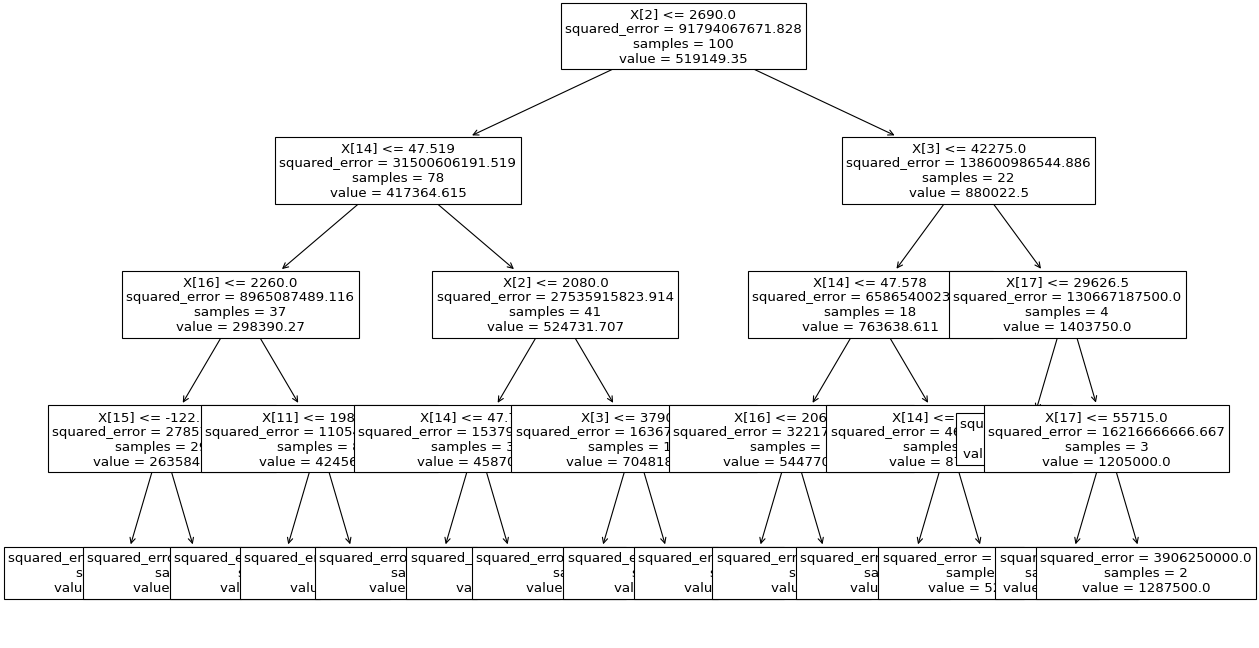

In [10]:
from matplotlib.pyplot import figure

figure(figsize=(16, 10), dpi=80)
plot_tree(clf_tree, fontsize = 12)

## DecisionTreeClassifier

In [11]:
target = "grade"
df_X = mini_df[[x for x in mini_df.columns if x != target]]
df_y = mini_df[target]

clf_tree = DecisionTreeClassifier(max_depth=4, criterion='entropy')
clf_tree.fit(df_X, df_y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [12]:
#tree_graph_to_png(tree=clf_tree, feature_names=[x for x in mini_df.columns if x != target])

In [ ]:
figure(figsize=(16, 10), dpi=80)
plot_tree(clf_tree, fontsize = 12)

[Text(635.5265433266095, 583.8666666666667, 'X[8] <= 8.5\nsquared_error = 127393022317.866\nsamples = 14480\nvalue = 537789.046'),
 Text(388.98154101529667, 543.6, 'X[14] <= 47.535\nsquared_error = 38304056574.133\nsamples = 11654\nvalue = 436901.389'),
 Text(203.62802571860817, 503.33333333333337, 'X[2] <= 1938.0\nsquared_error = 13588411710.124\nsamples = 4910\nvalue = 314249.544'),
 Text(106.2614585084328, 463.06666666666666, 'X[2] <= 1405.0\nsquared_error = 6902020773.637\nsamples = 3082\nvalue = 269551.719'),
 Text(66.99644197904409, 422.8, 'X[6] <= 0.5\nsquared_error = 5898519190.039\nsamples = 1479\nvalue = 240808.468'),
 Text(44.36958592480529, 382.5333333333333, 'X[14] <= 47.508\nsquared_error = 4688884359.963\nsamples = 1432\nvalue = 236464.193'),
 Text(28.17044881492688, 342.26666666666665, 'X[16] <= 1567.0\nsquared_error = 3726423593.432\nsamples = 1138\nvalue = 225595.777'),
 Text(15.76489045778002, 302.0, 'X[2] <= 1095.0\nsquared_error = 2629585835.486\nsamples = 853\nval

## Comparing Tree models

In [14]:
from sklearn.model_selection import train_test_split

target = "price"
feature_names = [x for x in mini_df.columns if x != target]

y = df[target]
X = df[feature_names]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

In [16]:
evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})

for d in tqdm(range(5,15)):
    clf_tree = DecisionTreeRegressor(max_depth=d, random_state=42)
    clf_tree.fit(X_train, y_train)
    pred = clf_tree.predict(X_test)

    rmsecm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
    rtrcm = float(format(clf_tree.score(X_train,y_train),'.3f'))
    artrcm = float(format(adjustedR2(clf_tree.score(X_train,y_train),X_train.shape[0],len(feature_names)),'.3f'))
    rtecm = float(format(clf_tree.score(X_test,y_test),'.3f'))
    artecm = float(format(adjustedR2(clf_tree.score(X_test,y_test),X_test.shape[0],len(feature_names)),'.3f'))
    cv = float(format(cross_val_score(clf_tree,df[feature_names],df['price'],cv=5).mean(),'.3f'))
    
    r = evaluation.shape[0]
    evaluation.loc[r] = [f'Trees-{d}','selected features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  1.68it/s]


In [17]:
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)
#Best linear model:
#Multiple Regression-4	all features	191879.550	0.701	0.7	0.713	0.711	0.698

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
5,Trees-10,selected features,181690.514,0.918,0.918,0.780,0.779,0.792
6,Trees-11,selected features,179720.374,0.936,0.936,0.784,0.784,0.786
4,Trees-9,selected features,186031.263,0.895,0.895,0.769,0.768,0.782
3,Trees-8,selected features,188627.417,0.867,0.867,0.762,0.762,0.780
7,Trees-12,selected features,183143.089,0.950,0.950,0.776,0.775,0.780
8,Trees-13,selected features,182949.935,0.963,0.963,0.776,0.776,0.774
2,Trees-7,selected features,192550.279,0.837,0.837,0.752,0.752,0.770
9,Trees-14,selected features,189463.296,0.973,0.973,0.760,0.760,0.768
1,Trees-6,selected features,206454.649,0.803,0.803,0.715,0.715,0.737
0,Trees-5,selected features,218353.751,0.760,0.760,0.682,0.681,0.701


## Feature Importance

In [18]:
plt.figure(figsize=(16,4))
[print(x) for x in sorted(zip(train_data[feature_names].columns,clf_tree.feature_importances_),key=lambda x:x[1],reverse=True)[:5]]
plt.bar(train_data[feature_names].columns,clf_tree.feature_importances_)

NameError: name 'train_data' is not defined

<Figure size 1152x288 with 0 Axes>